Lesson 1 - Fundamentals
====================

## Understanding Numpy and Pandas

[numpy](https://docs.scipy.org/doc/numpy/reference/) and [pandas](https://pandas.pydata.org/pandas-docs/stable/api.html) are libraries which help manipulate data in a structured manner. These libraries provide datastructures and algorithms that help manipulate data.

Since we installed numpy and pandas using anaconda and the [conda package manager](https://conda.io/docs/index.html), we have access to all the libraries we will need.

In [1]:
# First, we always need to include our libraries
import numpy as np
import pandas as pd

In [30]:
# Let's leran some basic operations with the numpy library
#########################

# Create a 1D array
A = np.array([1, 3, 3, 4])
print(A)

# Create a 2d matrix
B = np.matrix([[1, 2], [3, 4]])
print(B)

# Create a 2D identity matrix with 4 rows
C = np.eye(2)
print(C)

# Scalar multiplication
print(5 * A)

# matrix multiplication
A = A.reshape((2, 2))
print(A)
print(A * B)

print(A)
# some text

A = np.array([1, 2, 3, 4])
A = A.reshape((2, 2))
print(A)

[1 3 3 4]
[[1 2]
 [3 4]]
[[1. 0.]
 [0. 1.]]
[ 5 15 15 20]
[[1 3]
 [3 4]]
[[10 14]
 [15 22]]
[[1 3]
 [3 4]]
[[1 2]
 [3 4]]


In [34]:
# Indexing
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(x[1:7:2])
print(x[-2:10])
print(x[-3:3:-1])
print(x[5:])

[1 3 5]
[8 9]
[7 6 5 4]
[5 6 7 8 9]


In [38]:
# There are many algorithms which numpy provides.
######################

# Generate an array from a specified range
arr3 = np.arange(10)
print(arr3)

# Shuffle an array
np.random.shuffle(arr3)
print(arr3)

# Generate a random integer
r1 = np.random.randint(1,10,11)
print(r1)
# Sum
sum(arr3)

[0 1 2 3 4 5 6 7 8 9]
[7 3 9 0 5 4 1 2 6 8]
[6 3 5 8 6 9 6 1 2 6 1]


45

### Basic Application and Review

> Let's use numpy to simulate coin flips and dice rolls.

Assume you flip 5 fair coins (i.e. the probability of a coin landing on one side is 0.5). Write a small function which will determine the _estimated probability_ that at most 3 coins will be heads.

In [2]:
def flip_coins():
    trials = 100000
    results = 0
    for i in range(0, trials):
        each_try = np.random.randint(0, 2, size=5)
        if sum(each_try) <= 3:
            results += 1
    return results/trials
flip_coins()

0.81315

In [0]:
# Example
# Challenge problem
# Write a function which takes 3 dices and returns the estimated probability
# that the total score is greater than 11 or odd

def dice(n):
    trials = 100000
    results = 0
    for i in range(trials):
        s = np.random.randint(1, 7, size = n)
        if (sum(s) > 11) or (sum(s) % 2 == 1):
            results += 1
    return results / trials
print(dice(4))

0.90449


## Get started in Machine Learning

In this example we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days Thursday to Sunday, dinner or lunch and from different table size.

### Step 1: Import libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


#### Import data

In [6]:
data = sns.load_dataset('tips')
# data.head()
# data.tail()
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
55,19.49,3.51,Male,No,Sun,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
89,21.16,3.00,Male,No,Thur,Lunch,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [23]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Step 2: Ask questions

#### What kind of category are there in column 'sex', 'smoker', 'day', 'time'?

In [0]:
data['sex'].unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [0]:
data['smoker'].unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [0]:
data['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [0]:
data['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [48]:
data['size'].unique()

array([2, 3, 4, 1, 6, 5])

#### How many woman/man pay for the dish?

In [0]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### Lets find out what is the best day to work – maximum tips (sum and percents)

In [50]:
data2 = data.groupby('day').sum()
data2['percent'] = data2['tip']/data2['total_bill']*100
data2
# data2.head()

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


#### Who eats more (and tips more)? smokers or non smokers?

In [51]:
data3 = data.groupby('smoker').sum()
data3['percent'] = data3['tip']/data3['total_bill']*100
data3.head()

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


### Step 3: Data vizualization

Let's draw some seaborn graph

#### Tables per day

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


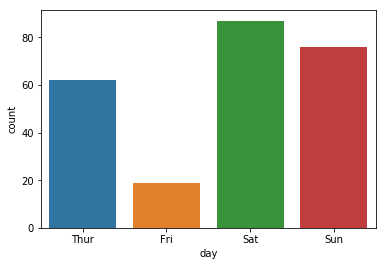

In [52]:
print(data['day'].value_counts())
sns.countplot(x='day', data=data)


#### Tables per day per gender


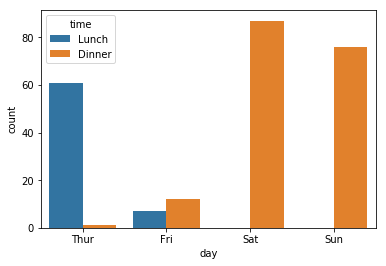

In [53]:
sns.countplot(x='day',hue='time', data=data)

#### Table lunch vs dinner

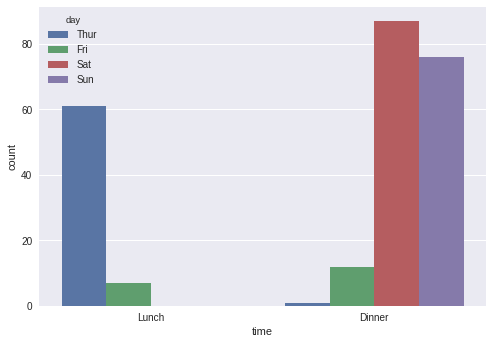

In [0]:
sns.countplot(data=data, x='time', hue='day')

### Correlation
Examine relationships between variables

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


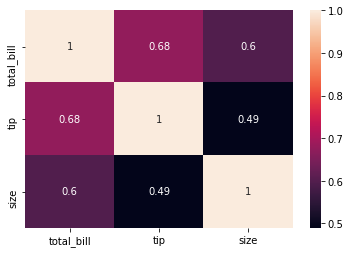

In [9]:
data_corr = data.corr()
print(data_corr)
sns.heatmap(data_corr, annot=True)

### Step 4: Transform and clean the data

Before we start building our model, we need to convert all the text values into numbers. 

#### Convert sex and smoker to values

In [56]:
input_data = data.replace({'sex': {'Male': 0, 'Female':1}, 'smoker':{'No':0, 'Yes':1}, 'time': {'Lunch':0, 'Dinner':1}})
input_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,1,2
1,10.34,1.66,0,0,Sun,1,3
2,21.01,3.50,0,0,Sun,1,3
3,23.68,3.31,0,0,Sun,1,2
4,24.59,3.61,1,0,Sun,1,4


#### Handle categorical variable

The values in day column are:  Thu, Fri, Sat, Sun we can convert it to 1,2,3,4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies.

In [57]:
input_data = pd.get_dummies(input_data, columns=['day'], drop_first=True)
input_data.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,0,1,2,0,0,1
1,10.34,1.66,0,0,1,3,0,0,1
2,21.01,3.50,0,0,1,3,0,0,1
3,23.68,3.31,0,0,1,2,0,0,1
4,24.59,3.61,1,0,1,4,0,0,1


In [58]:
X = input_data[['total_bill', 'sex', 'smoker', 'time', 'size','day_Fri','day_Sat','day_Sun']]
y = input_data[['tip']]

Now lets split the data into test and train so we can test our model before we use it.

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [70]:
data[data['total_bill'] < 100]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
